In [3]:
#We now want to add acceptance rate and entrance rate to our data file

import pandas as pd

# Read the CSV file into a Pandas DataFrame
#df = pd.read_csv("Data/MAXI.csv")

#years = ['2019/20', '2020/21', '2021/22', '2022/23', '2023/2024']

# Calculate acceptance rate and entrance rate for each year
#for year in years:
    #apps_col = f'Apps {year}'
    #offers_col = f'Offers {year}'
    #entrants_col = f'Entrants {year}'
    #accept_rate_col = f'Acceptance Rate {year}'
    #entrance_rate_col = f'Entrance Rate {year}'
    
    # Calculate acceptance rate: offers / applications
    #df[accept_rate_col] = df[offers_col] / df[apps_col]
    
    # Calculate entrance rate: entrants / offers
    #df[entrance_rate_col] = df[entrants_col] / df[offers_col]

#df.to_csv("Data/Maxi.csv", index=False)

In [4]:
# Now we want to filter out the european students, in our data they are characterized by nationality
import csv

# Define the file paths, downloaded these csv files from GITHUB
eu_countries_file = "Data/EU-countries.csv"
nationalities_file = "Data/countries.csv"

# Initialize a set to store European nationalities
EU_nationalities = set()

# get EU countries from the CSV file
eu_countries = set()
with open(eu_countries_file, newline='', encoding='utf-8') as csvfile:
    reader = csv.reader(csvfile)
    next(reader)  # Skip header
    for row in reader:
        country_name = row[2].strip()  # country name is in first column
        eu_countries.add(country_name)

# Read the nationalities from the CSV file and filter European nationalities
with open(nationalities_file, newline='', encoding='utf-8') as csvfile:
    reader = csv.reader(csvfile)
    next(reader) 
    for row in reader:
        country_name = row[3].strip()  # country name is in fourth column
        if country_name in eu_countries: 
            EU_nationalities.add(row[4])  # nationality is in fifth column
# check if all countries are there(should be 27)            
print(len(EU_nationalities))

27


In [5]:
#Now we change the CSV file with the acceptance rates so it oonly includes EU students

# Define the file paths
input_csv_file = "Data/MAXI.csv" 
output_csv_file = "Data/EU_students_acceptance_by_department.csv"  

# Open the input CSV file for reading and the output CSV file for writing
with open(input_csv_file, newline='', encoding='utf-8') as input_file, \
     open(output_csv_file, 'w', newline='', encoding='utf-8') as output_file:
    # Create CSV reader and writer objects
    reader = csv.reader(input_file)
    writer = csv.writer(output_file)

    # Read and write the first header row to the output file
    first_header = next(reader)
    writer.writerow(first_header)

    # Read and write the second header row to the output file
    second_header = next(reader)
    writer.writerow(second_header)

    # Iterate over each row in the input CSV file
    for row in reader:
        # Check if the nationality in the first column is in the list of European nationalities
        if row[0].strip() in EU_nationalities:
            # Write the row to the output CSV file
            writer.writerow(row)


In [6]:
# Read the CSV file into a Pandas DataFrame
data = pd.read_csv("Data/EU_students_acceptance_by_department.csv")
data

,Nationality,Department,Programe,Apps 2019/20,Offers 2019/20,Entrants 2019/20,Apps 2020/21,Offers 2020/21,Entrants 2020/21,Apps 2021/22,...,Acceptance Rate 2019/20,Entrance Rate 2019/20,Acceptance Rate 2020/21,Entrance Rate 2020/21,Acceptance Rate 2021/22,Entrance Rate 2021/22,Acceptance Rate 2022/23,Entrance Rate 2022/23,Acceptance Rate 2023/2024,Entrance Rate 2023/2024
0,German,Accounting,UG Degree,100,97,94,91,88,85,82,...,0.970000,0.969072,0.967033,0.965909,0.963415,0.962025,0.958904,0.957143,0.953125,0.950820
1,German,Accounting,PG Taught,96,93,90,87,84,81,78,...,0.968750,0.967742,0.965517,0.964286,0.961538,0.960000,0.956522,0.954545,0.950000,0.947368
2,German,Anthropology,UG Degree,58,55,52,49,46,43,40,...,0.948276,0.945455,0.938776,0.934783,0.925000,0.918919,0.903226,0.892857,0.863636,0.842105
3,German,Economic History,UG Degree,97,94,91,88,85,82,79,...,0.969072,0.968085,0.965909,0.964706,0.962025,0.960526,0.957143,0.955224,0.950820,0.948276
4,German,Economic History,PG Taught,96,93,90,87,84,81,78,...,0.968750,0.967742,0.965517,0.964286,0.961538,0.960000,0.956522,0.954545,0.950000,0.947368


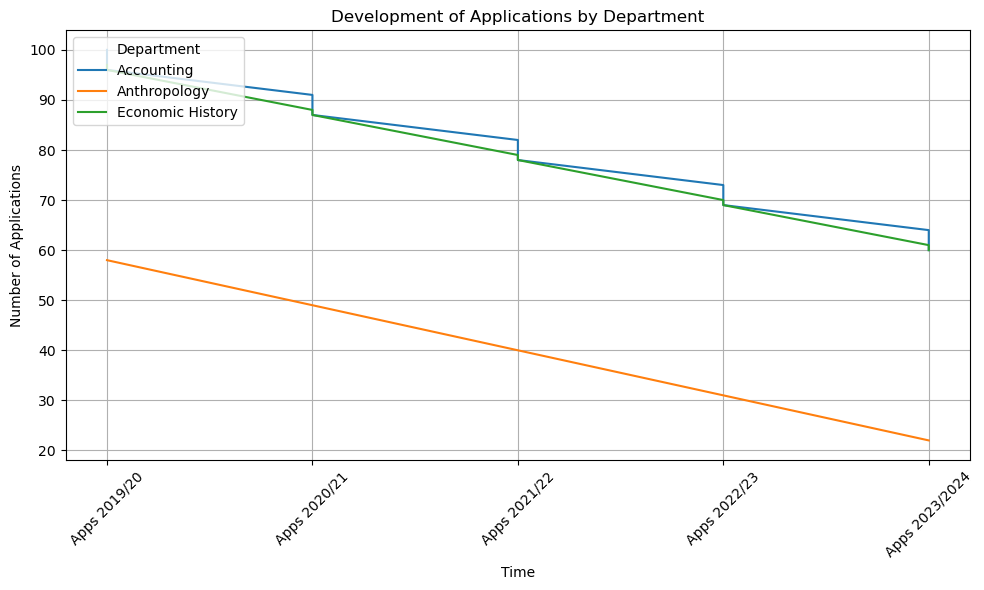

In [10]:
import matplotlib.pyplot as plt

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv("Data/EU_students_acceptance_by_department.csv")

# Extract the columns of interest (4th, 7th, 10th, 13th, and 16th columns)
columns_of_interest = df.columns[[3, 6, 9, 12, 15]]

# Melt the DataFrame to unpivot the data
df_melted = df.melt(id_vars=[df.columns[1]], value_vars=columns_of_interest, var_name='Time', value_name='Applications')

# Plot the development of applications for each department over time
plt.figure(figsize=(10, 6))
for department, data in df_melted.groupby('Department'):
    plt.plot(data['Time'], data['Applications'], label=department)

plt.title('Development of Applications by Department')
plt.xlabel('Time')
plt.ylabel('Number of Applications')
plt.grid(True)
plt.legend(title='Department', loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


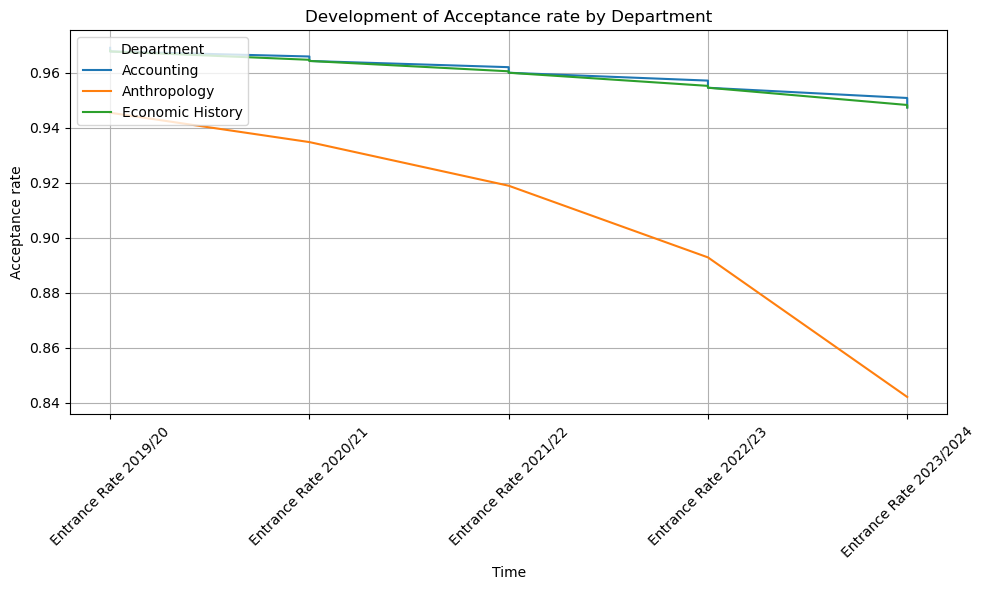

In [11]:

# Extract the columns of interest
columns_of_interest = df.columns[[19, 21, 23, 25, 27]]

# Melt the DataFrame to unpivot the data
df_melted = df.melt(id_vars=[df.columns[1]], value_vars=columns_of_interest, var_name='Time', value_name='Acceptance rate')

# Plot the development of applications for each department over time
plt.figure(figsize=(10, 6))
for department, data in df_melted.groupby('Department'):
    plt.plot(data['Time'], data['Acceptance rate'], label=department)

plt.title('Development of Acceptance rate by Department')
plt.xlabel('Time')
plt.ylabel('Acceptance rate')
plt.grid(True)
plt.legend(title='Department', loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [22]:
import plotly.express as px
import re

# Melt the DataFrame to have one row per application type and year
df_melted = pd.melt(df, id_vars=['Department', 'Programe'], 
                     value_vars=['Apps 2019/20', 'Apps 2020/21', 'Apps 2021/22', 'Apps 2022/23', 'Apps 2023/2024'],
                     var_name='Year', value_name='Applications')

# Split the Programe column into UG Degree and PG Taught columns
df_melted[['Degree', 'Programe']] = df_melted['Programe'].str.split(' ', n=1, expand=True)

# Convert the 'Year' column to numerical values
df_melted['Year'] = df_melted['Year'].apply(lambda x: re.search(r'\d{4}', x).group())

# Create an interactive scatterplot with regression line
fig = px.scatter(df_melted, x='Year', y='Applications', color='Degree', symbol='Programe', trendline='ols', hover_data=['Department', 'Programe'])
fig.update_layout(title='Applications Over Time by Programe and Degree with OLS estimator', xaxis_title='Year', yaxis_title='Applications')
fig.show()